# 世界幸福度指標の要因分析（2015–2022）

氏名：kaku akira  
学籍番号：1254820131  

## 研究テーマ
経済・健康・自由度が幸福度スコアにどの程度影響を与えているのかを分析する。

## 研究テーマを選んだ理由
幸福度は経済的豊かさだけで決まるのではなく、健康や社会制度など
複数の要因が関係していると考えられる。
本研究では、データを用いてどの要因が特に重要なのかを明らかにする。


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # 追加

# CSVファイルを読み込む
df = pd.read_csv('world_happiness_report.csv')

# データの最初の5行を表示
df.head()

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,year
0,0,Switzerland,Western Europe,1.0,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,1,Iceland,Western Europe,2.0,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,2,Denmark,Western Europe,3.0,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,3,Norway,Western Europe,4.0,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,4,Canada,North America,5.0,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


## 分析① 地域別の平均幸福度スコア
地域ごとに幸福度スコアの平均を算出し、どの地域が最も幸福度が高いかを確認する。


In [8]:
region_happiness = df.groupby("Region")["Happiness Score"].mean().sort_values(ascending=False)
region_happiness


Region
Australia and New Zealand          7.304250
North America                      7.263500
Western Europe                     6.687643
Latin America and Caribbean        6.122283
Eastern Asia                       5.625167
Middle East and Northern Africa    5.396744
Central and Eastern Europe         5.351810
Southeastern Asia                  5.328167
Southern Asia                      4.572071
Sub-Saharan Africa                 4.170462
Name: Happiness Score, dtype: float64

可視化①：地域別平均幸福度

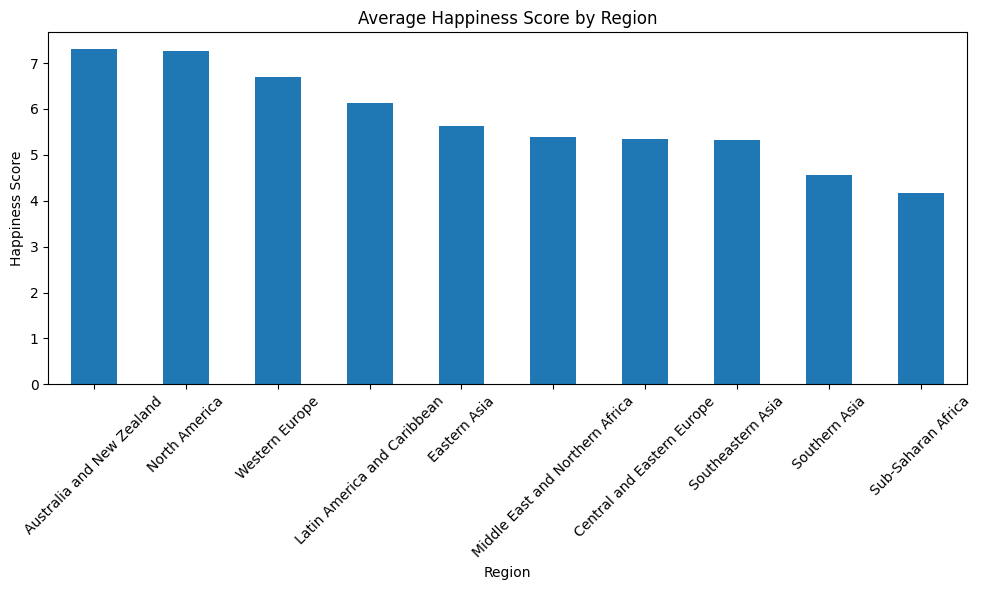

In [19]:
plt.figure(figsize=(10,6))
region_happiness.plot(kind="bar")
plt.title("Average Happiness Score by Region")
plt.xlabel("Region")
plt.ylabel("Happiness Score")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 分析② 経済（GDP）と幸福度の関係
一人当たりGDPと幸福度スコアの相関を調べる。


In [10]:
df[["Economy (GDP per Capita)", "Happiness Score"]].corr()


,Economy (GDP per Capita),Happiness Score
Economy (GDP per Capita),1.000000,0.779171
Happiness Score,0.779171,1.000000


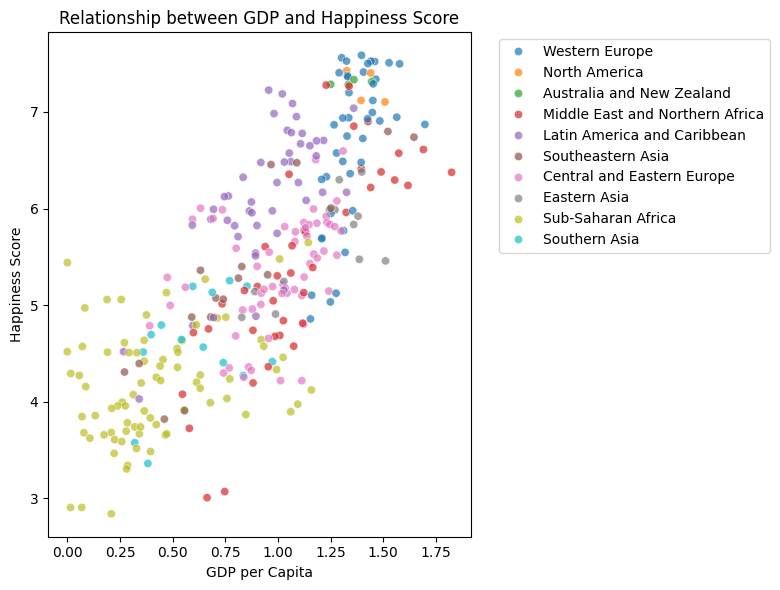

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="Economy (GDP per Capita)",
    y="Happiness Score",
    hue="Region",
    alpha=0.7
)
plt.title("Relationship between GDP and Happiness Score")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


## 分析③ 幸福度構成要素の相関分析
幸福度スコアと各要因（経済・家族・健康・自由など）の相関を調べる。


In [12]:
factors = [
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity",
    "Happiness Score"
]

corr_matrix = df[factors].corr()
corr_matrix["Happiness Score"].sort_values(ascending=False)


Happiness Score                  1.000000
Economy (GDP per Capita)         0.779171
Health (Life Expectancy)         0.734491
Family                           0.693547
Freedom                          0.556414
Trust (Government Corruption)    0.397989
Generosity                       0.168272
Name: Happiness Score, dtype: float64

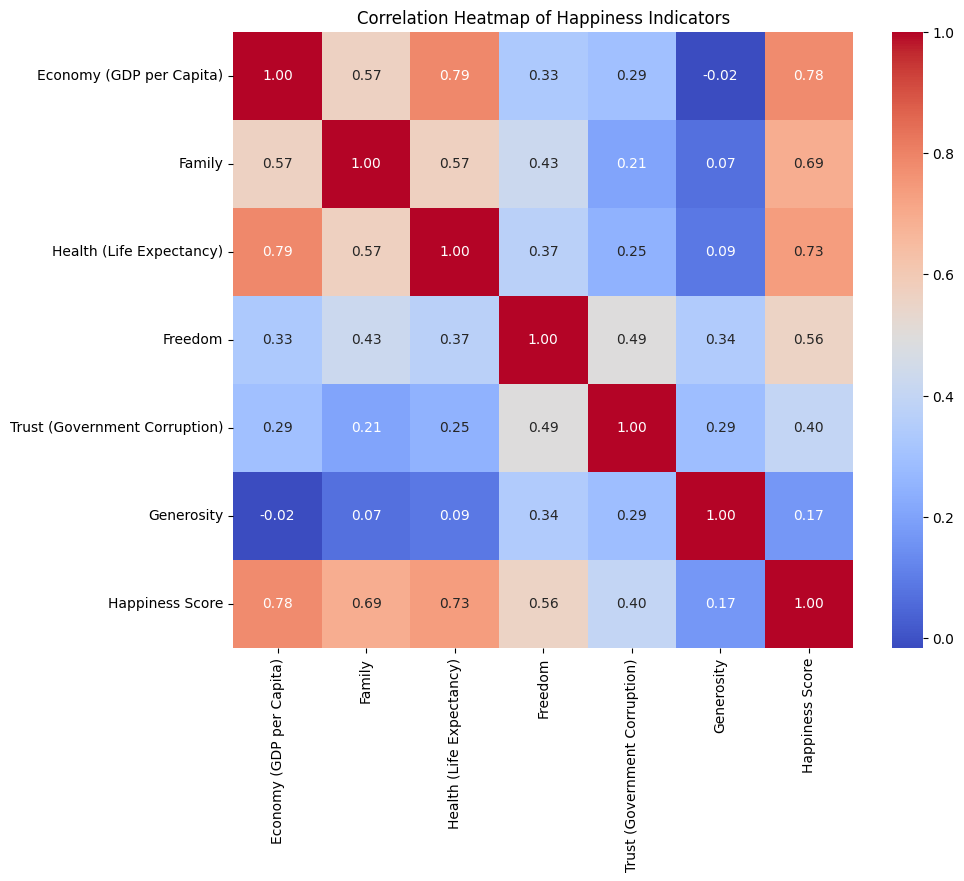

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Happiness Indicators")
plt.show()


In [14]:
japan = df[df["Country"] == "Japan"].sort_values("year")
japan[["year", "Happiness Rank", "Happiness Score"]]


,year,Happiness Rank,Happiness Score
45,2015,46.0,5.987
210,2016,53.0,5.921
365,2017,NaN,NaN
1137,2022,NaN,NaN


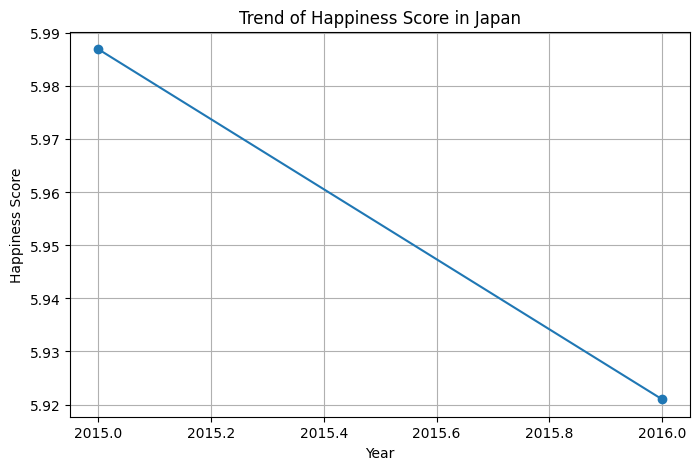

In [16]:
plt.figure(figsize=(8,5))
plt.plot(japan["year"], japan["Happiness Score"], marker="o")
plt.title("Trend of Happiness Score in Japan")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.grid(True)
plt.show()


## 結論

本研究では、2015年から2022年の世界幸福度データを用いて分析を行った。

主な結果は以下の通りである。

1. 地域別では、欧州や北米地域の平均幸福度が高い傾向が見られた。
2. GDPと幸福度スコアには正の相関があり、経済力は幸福度に一定の影響を与えている。
3. 特に「健康（平均寿命）」と「家族（社会的サポート）」は幸福度との相関が強く、
   経済要因以上に重要である可能性が示唆された。
4. 日本の幸福度は大きな変動はないものの、順位は他国との相対的変化に影響されている。

以上より、幸福度は経済的豊かさだけでなく、
健康や社会的つながりといった非経済的要因が重要であると結論づけられる。


## インタラクティブマップによる幸福度の可視化
世界各国の幸福度スコアを地図上に表示し、国ごとの違いを直感的に理解する。


In [20]:
%pip install pandas 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import folium

In [24]:
country_coords = {
    "Japan": [35.6895, 139.6917],
    "United States": [37.0902, -95.7129],
    "Finland": [61.9241, 25.7482],
    "France": [46.2276, 2.2137],
    "Brazil": [-14.2350, -51.9253]
}


In [25]:
df_2022 = df[df["year"] == 2022]

world_map = folium.Map(location=[20, 0], zoom_start=2)

for _, row in df_2022.iterrows():
    country = row["Country"]
    if country in country_coords:
        folium.CircleMarker(
            location=country_coords[country],
            radius=6,
            popup=f"{country}<br>Happiness Score: {row['Happiness Score']:.2f}",
            color="blue",
            fill=True,
            fill_opacity=0.7
        ).add_to(world_map)

world_map


In [26]:
df_2022 = df[df["year"] == 2022]

world_map = folium.Map(location=[20, 0], zoom_start=2)

for _, row in df_2022.iterrows():
    country = row["Country"]
    if country in country_coords:
        folium.CircleMarker(
            location=country_coords[country],
            radius=6,
            popup=f"{country}<br>Happiness Score: {row['Happiness Score']:.2f}",
            color="blue",
            fill=True,
            fill_opacity=0.7
        ).add_to(world_map)

world_map


地図上で確認すると、北欧諸国は幸福度スコアが高く、
アジアや南米の一部では相対的に低い傾向が見られた。
地理的・社会制度的要因の影響が示唆される。


## 機械学習による幸福度スコア予測
経済・家族・健康などの要因から幸福度スコアを予測するモデルを構築する。


In [28]:
%pip install scikit-learn

   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ------------------ --------------------- 3.7/8.0 MB 18.9 MB/s eta 0:00:01
   ---------------------------------------  7.9/8.0 MB 20.8 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 17.9 MB/s  0:00:00

   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   -------------------- ------------------- 1/2 [scikit-learn]
   ------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [36]:
features = [
    "Economy (GDP per Capita)",
    "Family",
    "Health (Life Expectancy)",
    "Freedom",
    "Trust (Government Corruption)",
    "Generosity"
 ]  # ← カンマを削除してリストに修正

X = df[features]
y = df["Happiness Score"]

# 欠損値を除去
Xy = pd.concat([X, y], axis=1).dropna()
X = Xy[features]
y = Xy["Happiness Score"]


In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [39]:
coef_df = pd.DataFrame({
    "Feature": features,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coef_df


,Feature,Coefficient
3,Freedom,1.403978
0,Economy (GDP per Capita),1.240043
1,Family,0.885665
2,Health (Life Expectancy),0.780770
5,Generosity,0.564433
4,Trust (Government Corruption),0.535532


線形回帰モデルの決定係数（R²）は比較的高く、
幸福度スコアは複数の要因から一定程度予測可能であることが分かった。
特に健康と家族要因の影響が大きい。


## plotlyによるインタラクティブ可視化
時系列での幸福度変化を動的に可視化する。


In [40]:
# !pip install plotly


In [41]:
import plotly.express as px


In [42]:
japan = df[df["Country"] == "Japan"]

fig = px.line(
    japan,
    x="year",
    y="Happiness Score",
    title="日本の幸福度スコアの推移",
    markers=True
)

fig.show()


In [43]:
fig = px.scatter(
    df,
    x="Economy (GDP per Capita)",
    y="Happiness Score",
    color="Region",
    animation_frame="year",
    hover_name="Country",
    title="GDPと幸福度の関係（年別変化）",
    size_max=10
)

fig.show()


# 結果
本研究では、静的なグラフだけでなく、
インタラクティブな地図・グラフや機械学習モデルを用いることで、
幸福度データを多角的に分析した。
